##  First Initialise the API

In [ ]:
gpt_api = "" ## Openai api
openrouter_api = "" ## openrouter api
Hugging_Face = "" # HF API

In [ ]:
!pip uninstall -y datasets
!pip install datasets==2.16.1


Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Would remove:
    /usr/local/bin/datasets-cli
    /usr/local/lib/python3.12/dist-packages/datasets-4.0.0.dist-info/*
    /usr/local/lib/python3.12/dist-packages/datasets/*
Proceed (Y/n)? y
  Successfully uninstalled datasets-4.0.0
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: dill
    Found existing installation: d

In [ ]:
# !hf auth login
import huggingface_hub

huggingface_hub.login( token =  Hugging_Face, add_to_git_credential = False)


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `testing` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `testing`


In [ ]:
from datasets import load_dataset

ds = load_dataset("code-rag-bench/ds1000")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
ds["train"]

Dataset({
    features: ['prompt', 'reference_code', 'metadata', 'code_context', 'docs'],
    num_rows: 1000
})

In [ ]:
import pandas as pd

df = pd.DataFrame(ds["train"])
print(df.head())

                                              prompt  \
0  Problem:\nI have the following DataFrame:\n   ...   
1  Problem:\nI have the following DataFrame:\n   ...   
2  Problem:\nI have following pandas dataframe :\...   
3  Problem:\nI have following pandas dataframe :\...   
4  Problem:\nI have following pandas dataframe :\...   

                                      reference_code  \
0  def g(df, List):\n    return df.iloc[List]\n\n...   
1  def g(df, List):\n    df2 = df.iloc[List].rein...   
2  def g(df):\n    return df.where(df.apply(lambd...   
3  def g(df):\n    return df.where(df.apply(lambd...   
4      result = df.where(df.apply(lambda x: x.map...   

                                            metadata  \
0  {'problem_id': 0, 'library_problem_id': 0, 'li...   
1  {'problem_id': 1, 'library_problem_id': 1, 'li...   
2  {'problem_id': 2, 'library_problem_id': 2, 'li...   
3  {'problem_id': 3, 'library_problem_id': 3, 'li...   
4  {'problem_id': 4, 'library_problem_id': 4, 

# Number of rows to test

In [ ]:
df = df.iloc[:15]

In [ ]:
df.shape

(250, 5)

In [ ]:
df.columns

Index(['prompt', 'reference_code', 'metadata', 'code_context', 'docs'], dtype='object')

In [ ]:
!pip install openai datasets matplotlib scikit-learn
!pip install codebleu[all]

!pip install tree-sitter-python==0.21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.2/546.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.0/313.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.5/165.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: tree-sitter-python

In [ ]:
#
import time
import logging
from openai import OpenAI  # or your client library
import warnings; warnings.filterwarnings("ignore")

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

client = OpenAI(
    api_key = gpt_api
)

def generate_code(prompt, model_name, max_retries=5):
    attempt = 0
    while attempt <= max_retries:
        try:
            if model_name == "gpt-4o-mini":
                response = client.chat.completions.create(
                    model=model_name,
                    messages=[
                        {
                            "role": "system",
                            "content": """You are a senior level Software developer, having advance skills in coding.
                                        Your task is to generate code based on user message. \n\n
                                        Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"""
                        },
                        {
                            "role": "user",
                            "content": prompt
                        }
                    ],
                    temperature=0.4,
                )
                return response.choices[0].message.content

            elif model_name == "meta-llama/llama-3.3-70b-instruct":
                client_mistral = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key = openrouter_api,
                                    )
                completion = client_mistral.chat.completions.create(
                    model="meta-llama/llama-3.3-70b-instruct",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "x-ai/grok-3-mini":
                client_grok = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_grok.chat.completions.create(
                    model="x-ai/grok-3-mini",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "google/gemini-2.0-flash-001":
                client_Gemini = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_Gemini.chat.completions.create(
                    model="google/gemini-2.0-flash-001",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "perplexity/sonar":
                client_perplexity = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_perplexity.chat.completions.create(
                    model="perplexity/sonar",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

        except Exception as e:
            attempt += 1
            wait_time = 2 ** attempt
            logging.error(f"Error on attempt {attempt}: {str(e)}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)

    logging.error("Max retries exceeded. Returning empty result.")
    return ""


In [ ]:
import re
import ast
import json
from sklearn.metrics import f1_score
from codebleu import calc_codebleu
import io
import sys
import pandas as pd


In [ ]:
# --- Metrics ---
def compute_codebleu(reference, prediction):
    result = calc_codebleu([reference], [prediction], lang="python",
                           weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)
    return result["codebleu"]


def compute_f1(reference, prediction):
    ref_tokens = reference.replace("\n", " ").split()
    pred_tokens = prediction.replace("\n", " ").split()
    ref_set, pred_set = set(ref_tokens), set(pred_tokens)
    tp = len(ref_set & pred_set)
    fp = len(pred_set - ref_set)
    fn = len(ref_set - pred_set)
    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)
    return f1

In [ ]:
samples = df.to_dict(orient="records")   # df is DS1000 dataframe

results = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}

# Build test cases from metadata (if present)
def build_tests(metadata):
    """
    In DS1000, metadata may contain input/output examples.
    Expecting metadata["io_pairs"] like [{"inputs": "...", "outputs": "..."}]
    """
    if not isinstance(metadata, dict):
        try:
            metadata = json.loads(metadata)
        except:
            return []
    return metadata.get("io_pairs", [])

## GPT 4o Mini

In [ ]:
    model = "gpt-4o-mini"
    generated_logs = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}
    for ex in samples:
        # Build prompt
        prompt = ex["prompt"]
        if ex.get("code_context"):
            prompt += "\nContext:\n" + str(ex["code_context"])
        if ex.get("docs"):
            prompt += "\nDocs:\n" + str(ex["docs"])

        # Generate model code
        model_code = generate_code(prompt, model)   # <-- your generation function

        # Clean markdown ``` formatting
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(),
                            flags=re.IGNORECASE | re.MULTILINE)
        model_code = re.sub(r"```$", "", model_code.strip())

        generated_logs[model].append(model_code)

        # Reference solution
        reference_code = ex["reference_code"]

        # Build tests from metadata
        test_cases = build_tests(ex["metadata"])


        codebleu = compute_codebleu(reference_code, model_code)
        f1 = compute_f1(reference_code, model_code)

        # Check Pass@1
        passed = 1 if codebleu >= 0.7 or f1 >= 0.7 else 0

        # Compute metrics
        metrics = {
            "pass@1": passed,
            "codebleu": compute_codebleu(reference_code, model_code),
            "f1": compute_f1(reference_code, model_code),
        }

        results[model].append(metrics)

    print(model)


gpt-4o-mini


list

## Llama

In [ ]:
    model = "meta-llama/llama-3.3-70b-instruct"

    for ex in samples:
        # Build prompt
        prompt = ex["prompt"]
        if ex.get("code_context"):
            prompt += "\nContext:\n" + str(ex["code_context"])
        if ex.get("docs"):
            prompt += "\nDocs:\n" + str(ex["docs"])

        # Generate model code
        model_code = generate_code(prompt, model)   # <-- your generation function

        # Clean markdown ``` formatting
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(),
                            flags=re.IGNORECASE | re.MULTILINE)
        model_code = re.sub(r"```$", "", model_code.strip())

        generated_logs[model].append(model_code)

        # Reference solution
        reference_code = ex["reference_code"]

        # Build tests from metadata
        test_cases = build_tests(ex["metadata"])


        codebleu = compute_codebleu(reference_code, model_code)
        f1 = compute_f1(reference_code, model_code)

        # Check Pass@1
        passed = 1 if codebleu >= 0.7 or f1 >= 0.7 else 0

        # Compute metrics
        metrics = {
            "pass@1": passed,
            "codebleu": compute_codebleu(reference_code, model_code),
            "f1": compute_f1(reference_code, model_code),
        }

        results[model].append(metrics)

    print(model)


meta-llama/llama-3.3-70b-instruct


## Grok

In [ ]:
    model = "x-ai/grok-3-mini"

    for ex in samples:
        # Build prompt
        prompt = ex["prompt"]
        if ex.get("code_context"):
            prompt += "\nContext:\n" + str(ex["code_context"])
        if ex.get("docs"):
            prompt += "\nDocs:\n" + str(ex["docs"])

        # Generate model code
        model_code = generate_code(prompt, model)   # <-- your generation function

        # Clean markdown ``` formatting
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(),
                            flags=re.IGNORECASE | re.MULTILINE)
        model_code = re.sub(r"```$", "", model_code.strip())

        generated_logs[model].append(model_code)

        # Reference solution
        reference_code = ex["reference_code"]

        # Build tests from metadata
        test_cases = build_tests(ex["metadata"])


        codebleu = compute_codebleu(reference_code, model_code)
        f1 = compute_f1(reference_code, model_code)

        # Check Pass@1
        passed = 1 if codebleu >= 0.7 or f1 >= 0.7 else 0

        # Compute metrics
        metrics = {
            "pass@1": passed,
            "codebleu": compute_codebleu(reference_code, model_code),
            "f1": compute_f1(reference_code, model_code),
        }

        results[model].append(metrics)

    print(model)


x-ai/grok-3-mini


## Gemini

In [ ]:
    model = "google/gemini-2.0-flash-001"

    for ex in samples:
        # Build prompt
        prompt = ex["prompt"]
        if ex.get("code_context"):
            prompt += "\nContext:\n" + str(ex["code_context"])
        if ex.get("docs"):
            prompt += "\nDocs:\n" + str(ex["docs"])

        # Generate model code
        model_code = generate_code(prompt, model)   # <-- your generation function

        # Clean markdown ``` formatting
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(),
                            flags=re.IGNORECASE | re.MULTILINE)
        model_code = re.sub(r"```$", "", model_code.strip())

        generated_logs[model].append(model_code)

        # Reference solution
        reference_code = ex["reference_code"]

        # Build tests from metadata
        test_cases = build_tests(ex["metadata"])


        codebleu = compute_codebleu(reference_code, model_code)
        f1 = compute_f1(reference_code, model_code)

        # Check Pass@1
        passed = 1 if codebleu >= 0.7 or f1 >= 0.7 else 0

        # Compute metrics
        metrics = {
            "pass@1": passed,
            "codebleu": compute_codebleu(reference_code, model_code),
            "f1": compute_f1(reference_code, model_code),
        }

        results[model].append(metrics)

    print(model)


google/gemini-2.0-flash-001


## Perplexity

In [ ]:
    model = "perplexity/sonar"

    for ex in samples:
        # Build prompt
        prompt = ex["prompt"]
        if ex.get("code_context"):
            prompt += "\nContext:\n" + str(ex["code_context"])
        if ex.get("docs"):
            prompt += "\nDocs:\n" + str(ex["docs"])

        # Generate model code
        model_code = generate_code(prompt, model)   # <-- your generation function

        # Clean markdown ``` formatting
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(),
                            flags=re.IGNORECASE | re.MULTILINE)
        model_code = re.sub(r"```$", "", model_code.strip())

        generated_logs[model].append(model_code)

        # Reference solution
        reference_code = ex["reference_code"]

        # Build tests from metadata
        test_cases = build_tests(ex["metadata"])


        codebleu = compute_codebleu(reference_code, model_code)
        f1 = compute_f1(reference_code, model_code)

        # Check Pass@1
        passed = 1 if codebleu >= 0.7 or f1 >= 0.7 else 0

        # Compute metrics
        metrics = {
            "pass@1": passed,
            "codebleu": compute_codebleu(reference_code, model_code),
            "f1": compute_f1(reference_code, model_code),
        }

        results[model].append(metrics)

    print(model)


perplexity/sonar


In [ ]:
import numpy as np

summary = {}
for model, metrics in results.items():
    pass1 = np.mean([m["pass@1"] for m in metrics])
    cb = np.mean([m["codebleu"] for m in metrics])
    f1 = np.mean([m["f1"] for m in metrics])
    avg = np.mean([pass1, cb, f1])  # overall average for the model

    summary[model] = {
        "Pass@1": pass1,
        "CodeBLEU": cb,
        "F1": f1,
        "Average": avg
    }

summary


{'gpt-4o-mini': {'Pass@1': np.float64(0.007936507936507936),
  'CodeBLEU': np.float64(0.2985196177329304),
  'F1': np.float64(0.24762865682991037),
  'Average': np.float64(0.1846949274997829)},
 'meta-llama/llama-3.3-70b-instruct': {'Pass@1': np.float64(0.1),
  'CodeBLEU': np.float64(0.28717984707909855),
  'F1': np.float64(0.3756164957008387),
  'Average': np.float64(0.25426544759331243)},
 'x-ai/grok-3-mini': {'Pass@1': np.float64(0.18),
  'CodeBLEU': np.float64(0.37050421873574413),
  'F1': np.float64(0.46004048862403535),
  'Average': np.float64(0.3368482357865932)},
 'google/gemini-2.0-flash-001': {'Pass@1': np.float64(0.152),
  'CodeBLEU': np.float64(0.3277941320535982),
  'F1': np.float64(0.4300805101693215),
  'Average': np.float64(0.3032915474076399)},
 'perplexity/sonar': {'Pass@1': np.float64(0.056),
  'CodeBLEU': np.float64(0.2555361591638614),
  'F1': np.float64(0.34912349586399527),
  'Average': np.float64(0.22021988500928558)}}

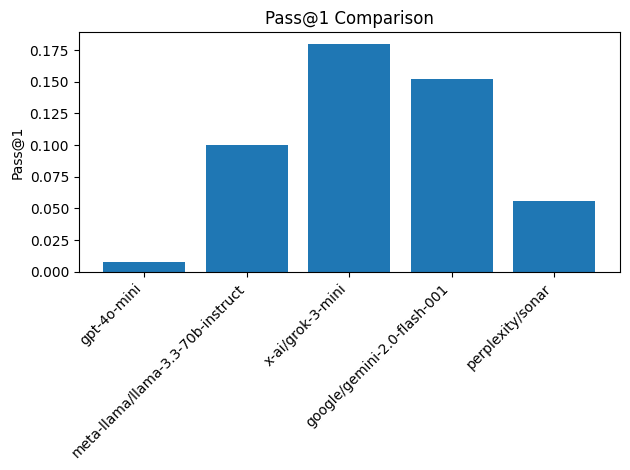

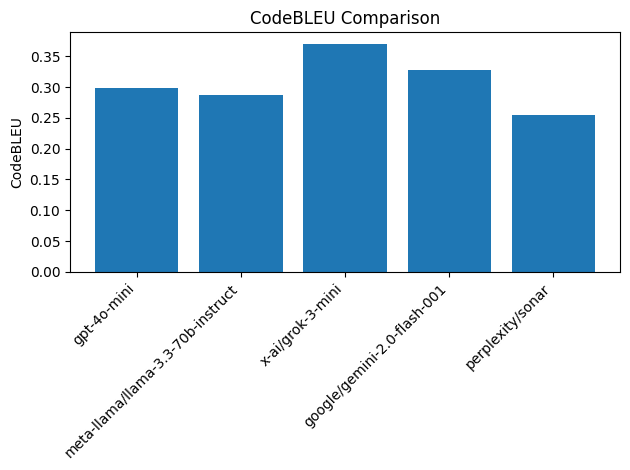

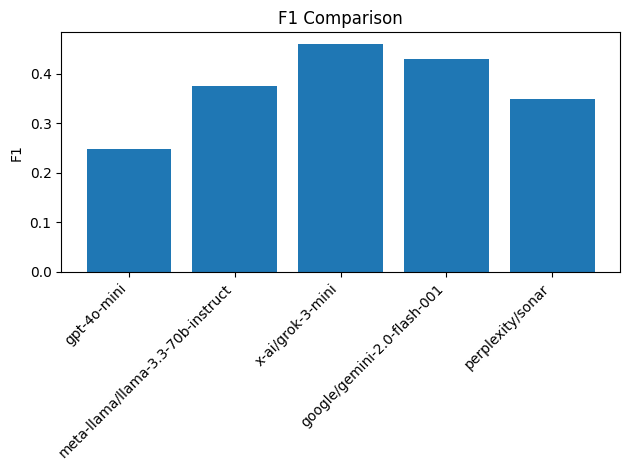

In [ ]:
import matplotlib.pyplot as plt

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = ["gpt-4o-mini",
          "meta-llama/llama-3.3-70b-instruct",
          "x-ai/grok-3-mini",
          "google/gemini-2.0-flash-001",
          "perplexity/sonar"]

for metric in metrics:
    values = [summary[m][metric] for m in models]

    plt.bar(models, values)
    plt.title(metric + " Comparison")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")  # rotate labels 45° and align right
    plt.tight_layout()                   # prevent cutoff
    plt.show()


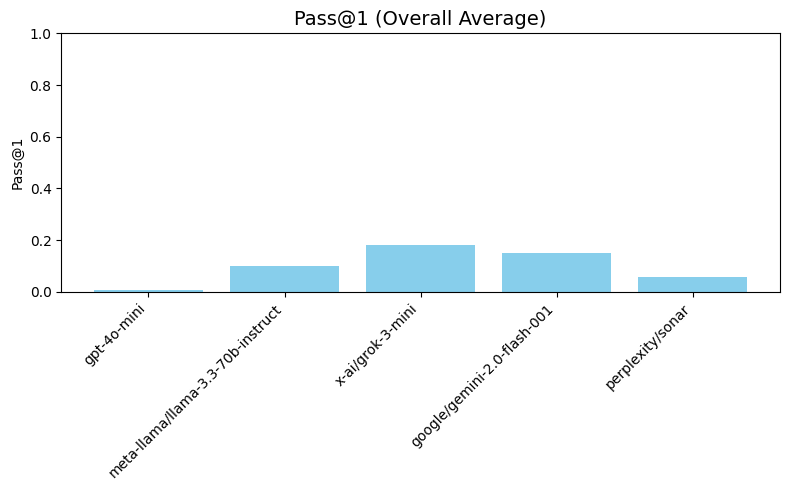

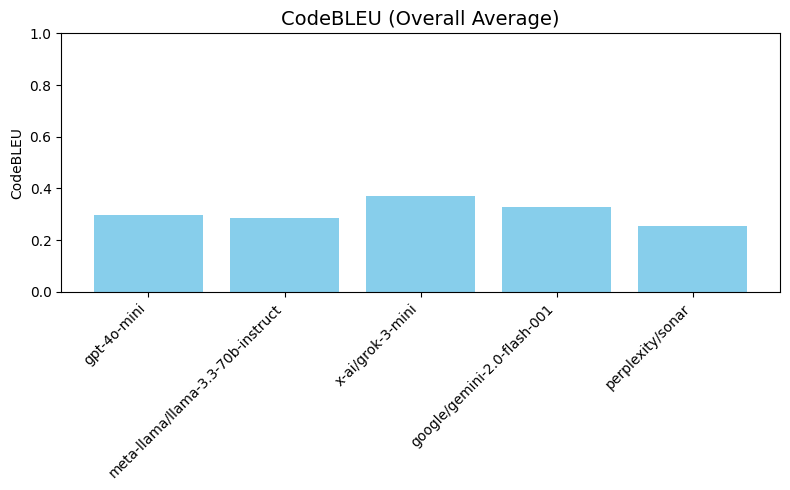

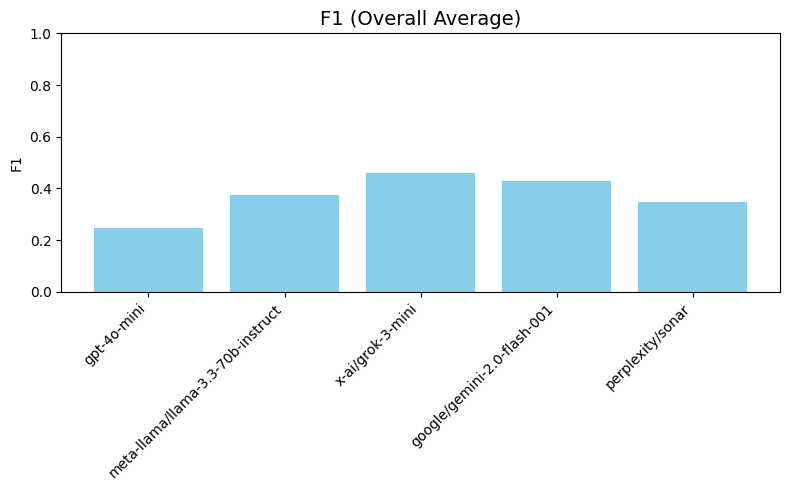

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

for metric in metrics:
    values = [summary[m][metric] for m in models]
    plt.figure(figsize=(8,5))
    plt.bar(models, values, color="skyblue")

    plt.title(f"{metric} (Overall Average)", fontsize=14)
    plt.ylabel(metric)
    plt.ylim(0,1)  # since most metrics are between 0–1
    plt.xticks(rotation=45, ha="right")  # rotate labels

    plt.tight_layout()  # prevent cutoff
    plt.show()



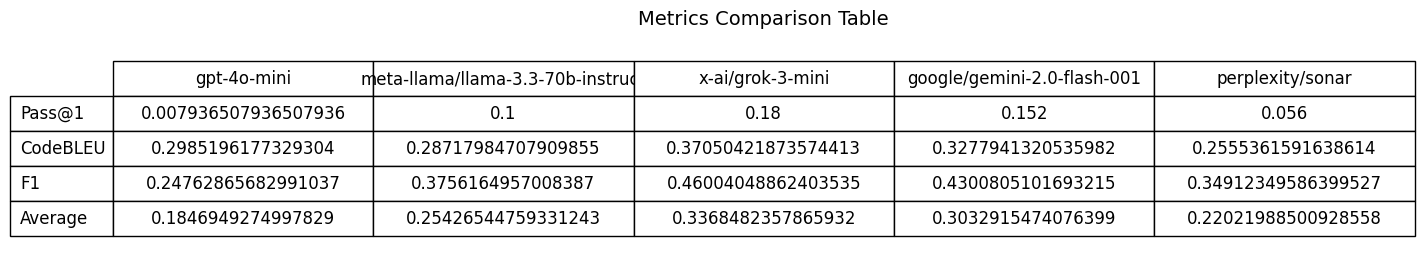

In [ ]:
metricss = ["Pass@1", "CodeBLEU", "F1", "Average"]
modelss = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('off')

# Include the "Average" row from summary
table_data = [[summary[model][metric] for model in modelss] for metric in metricss]

table = ax.table(cellText=table_data,
                 rowLabels=metricss,
                 colLabels=modelss,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.1, 2.1)

plt.title("Metrics Comparison Table", fontsize=14, pad=20)
plt.show()


In [ ]:
best_model = max(summary.items(), key=lambda x: x[1]["Average"])
print(f"Best Model: {best_model[0]}")
print(f"Average Score: {best_model[1]['Average']:.4f}")


Best Model: x-ai/grok-3-mini
Average Score: 0.3368


In [ ]:
# Save JSON
with open("result_ds.json", "w") as f:
    json.dump(results, f, indent=4)


print("Downloaded result_Apps.json to your local machine.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded result_Apps.json to your local machine.


In [ ]:
# Save JSON
with open("generated_code_ds.json", "w") as f:
    json.dump(generated_logs, f, indent=4)


print("Downloaded generated_code_ds.json to your local machine.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded result_Apps.json to your local machine.
